In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,BatchNormalization,MaxPool2D,Flatten
from keras.utils import to_categorical
import seaborn as sns

Using TensorFlow backend.


In [2]:
data = keras.datasets.cifar10.load_data()

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


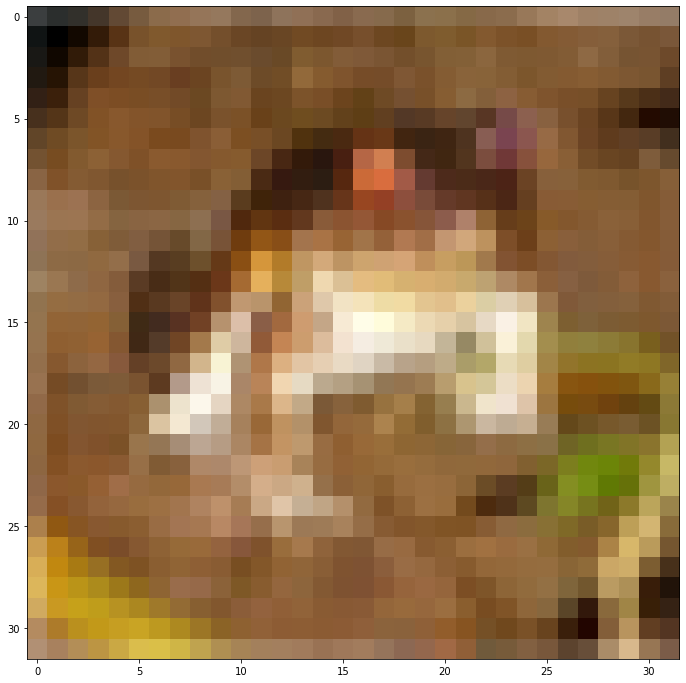

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255.
X_test = X_test/255.

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [8]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(4,4),activation='relu',input_shape=(32,32,3),kernel_initializer='uniform'))
model.add(BatchNormalization(momentum=0.9))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(4,4),activation='relu',kernel_initializer='uniform'))
model.add(BatchNormalization(momentum=0.9))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256,kernel_size=(4,4),activation='relu',kernel_initializer='uniform'))
model.add(BatchNormalization(momentum=0.9))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 64)        3136      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       131200    
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)        

In [9]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 204s 4ms/step - loss: 1.5207 - accuracy: 0.4626 - val_loss: 1.1815 - val_accuracy: 0.5812
Epoch 2/20
50000/50000 [==============================] - 207s 4ms/step - loss: 1.1441 - accuracy: 0.5999 - val_loss: 0.9844 - val_accuracy: 0.6558
Epoch 3/20
50000/50000 [==============================] - 200s 4ms/step - loss: 0.9642 - accuracy: 0.6643 - val_loss: 1.0875 - val_accuracy: 0.6332
Epoch 4/20
50000/50000 [==============================] - 198s 4ms/step - loss: 0.8386 - accuracy: 0.7081 - val_loss: 0.8821 - val_accuracy: 0.6992
Epoch 5/20
50000/50000 [==============================] - 199s 4ms/step - loss: 0.7316 - accuracy: 0.7466 - val_loss: 0.9326 - val_accuracy: 0.6953
Epoch 6/20
50000/50000 [==============================] - 205s 4ms/step - loss: 0.6452 - accuracy: 0.7764 - val_loss: 0.8466 - val_accuracy: 0.7168
Epoch 7/20
50000/50000 [==============================] - 195s

In [10]:
import keras
model.save('./Models/cifar')

new_model = keras.models.load_model('./Models/cifar')


<Figure size 864x864 with 0 Axes>

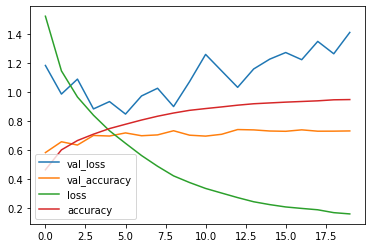

In [12]:
history = pd.DataFrame(model.history.history)
history.plot()

In [24]:
result = new_model.predict([[X_test[40]]])
print(np.argmax(result))
print(np.argmax(y_test[40]))

4
4
